#  Data visualization

## Data Wrangling

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

The data of 2018 is separated according to month. I should join them together.

In [2]:
import glob,os
path = r'C:\Users\15300\Documents\文件\Python\Visualization\2018'
file = glob.glob(os.path.join(path, "*.csv"))
print(file)
df_2018 = []
for f in file:
    df_2018.append(pd.read_csv(f))
df2018=pd.concat(df_2018,ignore_index=True)
df2018.to_csv('bike2018.csv',index=False)

['C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201801-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201802-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201803-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201804-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201805-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201806-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201807-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201808-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201809-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Python\\Visualization\\2018\\201810-fordgobike-tripdata.csv', 'C:\\Users\\15300\\Documents\\文件\\Pytho

In [3]:
df2018=pd.read.csv('bike2018.csv')
df=df2018.copy()

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


Before analysis, my questions are:
- What's the distribution of duration?
- Which day in a week has more bike users?
- Does peak time has more bike users?
- Which month do users take more trips?
- Does user_type affect duration?
- Which stations are more popular departures and destinations?

time variables need to be converted into datetime.
I will not analyze the distance here so useless columns should be removed to make the dataframe more concise.

Separate the month

Separate the time group
- 10-16 are considered as off-peak hours
- after 20 and before 6 are considered as night hours.
- The rest is considered as peak time.

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['Month'] = df['start_time'].apply(lambda time: time.month)
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['Rush'] = 'peak'
df['Rush'][(df['start_hour'] >= 10) & (df['start_hour'] <= 16)] = 'off-peak'
df['Rush'][(df['start_hour'] >= 20) & (df['start_hour'] <= 24)|(df['start_hour'] <= 6)] = 'night'

C:\Users\15300\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15300\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,Month,start_hour,Rush,start_day
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1,22,night,Wednesday
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1,16,off-peak,Wednesday
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1,14,off-peak,Wednesday
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1,14,off-peak,Wednesday
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,1,19,peak,Wednesday


What day of the week is it？

In [18]:
df['start_day'] = df['start_time'].apply(lambda time: time.dayofweek)
daydict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['start_day'] = df['start_day'].map(daydict)

In [19]:
df1=df.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_share_for_all_trip','start_hour'])

In [20]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,Month,Rush,start_day
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,2765,Subscriber,1,night,Wednesday
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,1,off-peak,Wednesday
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,3039,Customer,1,off-peak,Wednesday
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,47.0,4th St at Harrison St,321,Customer,1,off-peak,Wednesday
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,19.0,Post St at Kearny St,617,Subscriber,1,peak,Wednesday


In [21]:
df1.to_csv('bike2018_clean.csv',index=False)

------------------------------------------

By now we have the clean dataframe to work on.

In [3]:
df1=pd.read_csv('bike2018_clean.csv')

## Univariate Exploration

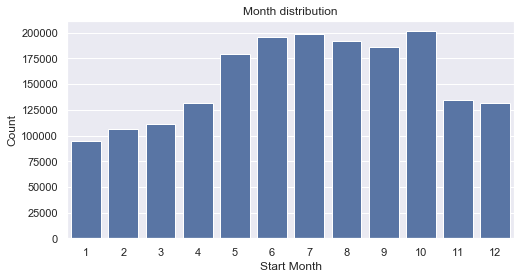

In [38]:
color = sns.color_palette()[0]
plt.figure(figsize=(8,4))
sns.countplot(data=df1, x='Month', color=color)
plt.xlabel('Start Month')
plt.ylabel('Count')
plt.title('Month distribution');

From this graph we can see that in summer and autumn there are more bike users. This could because of the temperature which is too cold for bike-riding in winter and spring. Also in August and September whose temperatures are too high has fewer bike users than July and October who have pleasant weather.

In [23]:
df1.start_day.value_counts()

Tuesday      319332
Wednesday    316374
Thursday     314124
Monday       294573
Friday       290390
Saturday     175614
Sunday       153314
Name: start_day, dtype: int64

Count start_day. We can see that in the middle of the week there are more bike users.And at weekend there are fewer bike users. Maybe people just prefer to stay at home at weekends.Or maybe they only choose bike if they hava limited time(late for school/work).

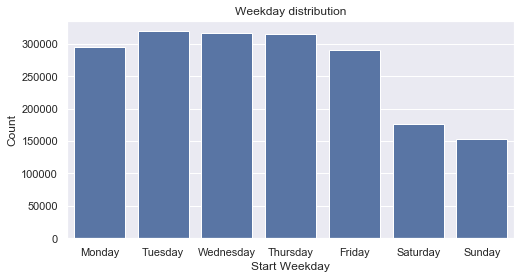

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(data=df1, x='start_day', color=color,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Start Weekday')
plt.ylabel('Count')

plt.title('Weekday distribution');

Count the time group. We can see that during peak hours, there are more bike users. During night hours there are fewer bike users. This makes sense.

In [22]:
df1.Rush.value_counts()

peak        964775
off-peak    664662
night       234284
Name: Rush, dtype: int64

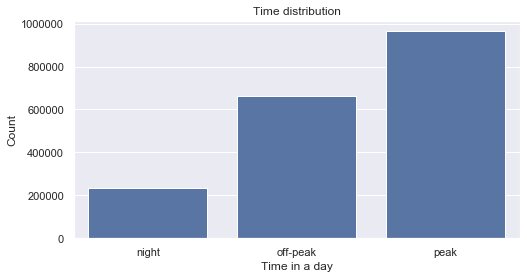

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(data=df1, x='Rush', color=color)
plt.xlabel('Time in a day')
plt.ylabel('Count')

plt.title('Time distribution');

In [47]:
print(df1['start_station_name'].nunique())
print(df1['end_station_name'].nunique())

348
348


In [49]:
set(df1['start_station_name'])==set(df1['end_station_name'])

True

There are 348 stations.

In [65]:
df1['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)          37617
San Francisco Caltrain (Townsend St at 4th St)                     35092
Market St at 10th St                                               34918
Berry St at 4th St                                                 33716
The Embarcadero at Sansome St                                      33390
Montgomery St BART Station (Market St at 2nd St)                   32131
Powell St BART Station (Market St at 4th St)                       31656
Steuart St at Market St                                            28367
Howard St at Beale St                                              26535
Powell St BART Station (Market St at 5th St)                       25007
Embarcadero BART Station (Beale St at Market St)                   21883
3rd St at Townsend St                                              21649
Townsend St at 7th St                              

San Francisco Ferry Building (Harry Bridges Plaza)                 
San Francisco Caltrain Station 2  (Townsend St at 4th St)          
San Francisco Caltrain (Townsend St at 4th St)                     
Market St at 10th St                                               
Berry St at 4th St                                                 
The Embarcadero at Sansome St                                      
Montgomery St BART Station (Market St at 2nd St)                
Powell St BART Station (Market St at 4th St)
Are stations that have more than 30000 trips

In [66]:
df1['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          50000
San Francisco Ferry Building (Harry Bridges Plaza)                 44113
San Francisco Caltrain (Townsend St at 4th St)                     42970
The Embarcadero at Sansome St                                      39222
Montgomery St BART Station (Market St at 2nd St)                   35955
Market St at 10th St                                               34365
Powell St BART Station (Market St at 4th St)                       33086
Berry St at 4th St                                                 32786
Steuart St at Market St                                            28592
Powell St BART Station (Market St at 5th St)                       26002
Howard St at Beale St                                              23926
3rd St at Townsend St                                              21094
Townsend St at 7th St                                              20427
Embarcadero BART Station (Beale St at Market St)   

San Francisco Caltrain Station 2  (Townsend St at 4th St)       
San Francisco Ferry Building (Harry Bridges Plaza)                 
San Francisco Caltrain (Townsend St at 4th St)                     
The Embarcadero at Sansome St                                      
Montgomery St BART Station (Market St at 2nd St)                   
Market St at 10th St                                               
Powell St BART Station (Market St at 4th St)                       
Berry St at 4th St

Are destinations that have more than 30000 trips
This list is the same as popular departure stations.

In [13]:
popular_stations=['San Francisco Caltrain Station 2 (Townsend St at 4th St)',
                  'San Francisco Ferry Building (Harry Bridges Plaza)',
                  'San Francisco Caltrain (Townsend St at 4th St)',
                  'The Embarcadero at Sansome St',
                  'Montgomery St BART Station (Market St at 2nd St)',
                  'Market St at 10th St',
                  'Powell St BART Station (Market St at 4th St)',
                  'Berry St at 4th St']
df_ps=df1.loc[df1['start_station_name'].isin(popular_stations)]
df_pe=df1.loc[df1['end_station_name'].isin(popular_stations)]

Keep record of the popular stations.Further visualizaion will be performed only on them to show the pattern of different stations.

In [6]:
df_ps.to_csv('bike2018_popular_stations.csv',index=False)

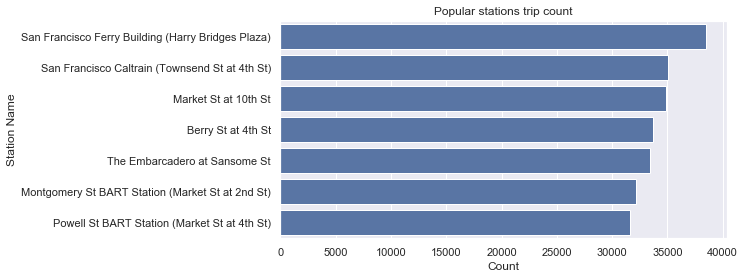

In [73]:
plt.figure(figsize=(8,4))
order_s = df_ps['start_station_name'].value_counts().index
color = sns.color_palette()[0]
sns.countplot(data=df_ps, y='start_station_name', color=color,order=order)
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.title('Popular stations trip count');

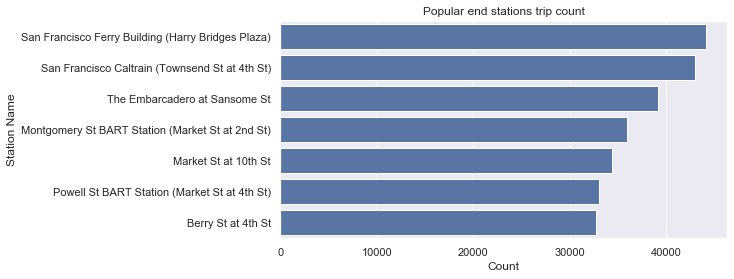

In [82]:
plt.figure(figsize=(8,4))
order = df_pe['end_station_name'].value_counts().index
color = sns.color_palette()[0]
sns.countplot(data=df_pe, y='end_station_name', color=color,order=order)
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.title('Popular end stations trip count');

Then I count the number of subscribers and customers.It shows that the number of subscribers is much higher than customers. This makes sense because if the user uses this bike frequently it would be much cheaper for that person to become a subscriber. Only those who are sure that they will only use this service not so often for example only use bike for emergency since they own cars will choose not become a subscriber.

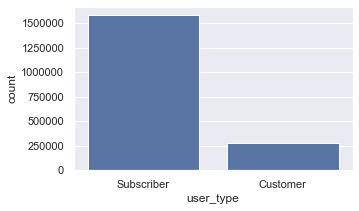

In [78]:
sns.countplot(data = df1, x = 'user_type', color = color)

Then I plot the distribution of duration time.

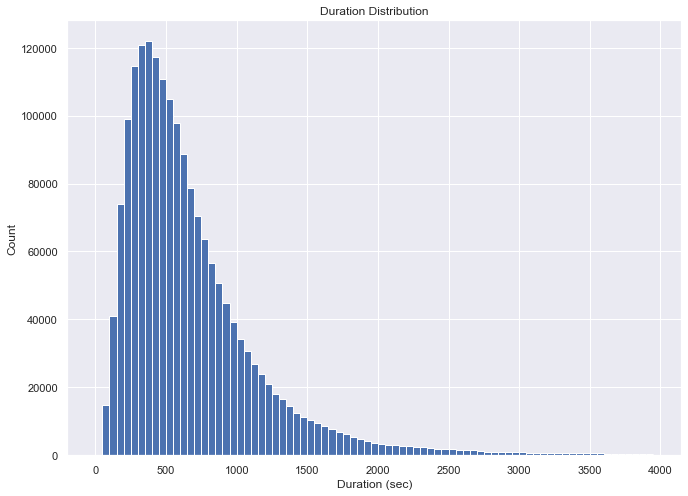

In [86]:
plt.figure(figsize=(11,8))
bins = np.arange(0, 4000, 50)
plt.hist(data=df1, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution');

The histgram is skewd so I performed an axis log transformation.

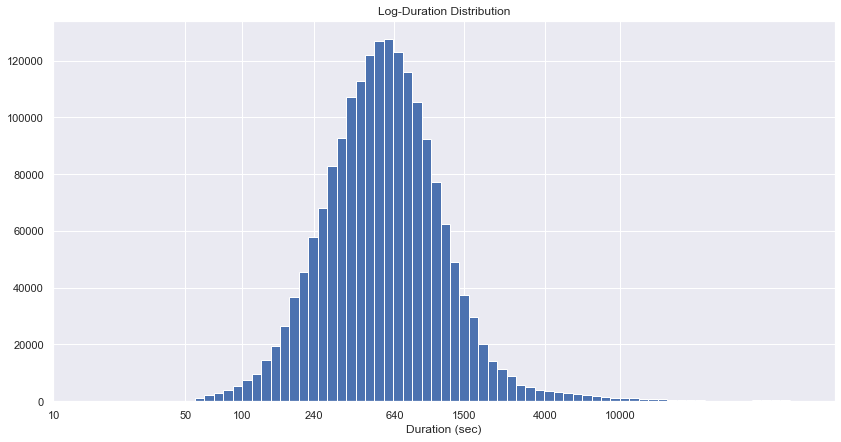

In [118]:
bins = 10 ** np.arange(1.2, np.log10(df1['duration_sec'].max())+0.05, 0.05)
plt.figure(figsize=[14, 7])
plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,100,240,640,1500,4000,10000], [10,50,100,240,640,1500,4000,10000])
plt.xlabel('Duration (sec)')
plt.title('Log-Duration Distribution');

This histograph seems to be normal distributed. Most of the durations are between 240 seconds(4 min) to 1500 seconds(25 min).

## Bivariate Exploration

In [121]:
df_ps.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,Month,Rush,start_day
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,1,off-peak,Wednesday
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,1403,Subscriber,1,night,Wednesday
30,375,2018-01-31 22:56:31.082,2018-01-31 23:02:46.583,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,3401,Subscriber,1,night,Wednesday
32,2219,2018-01-31 22:24:39.943,2018-01-31 23:01:39.571,30.0,San Francisco Caltrain (Townsend St at 4th St),81.0,Berry St at 4th St,1757,Subscriber,1,night,Wednesday
41,222,2018-01-31 22:44:28.364,2018-01-31 22:48:11.022,58.0,Market St at 10th St,61.0,Howard St at 8th St,3483,Subscriber,1,night,Wednesday


Then I want to know the trip counts in each time group at each popular station. Trips made in night time is almost the same in each station. However in some station such as The Embarcadero at Sansome St the trips made during off-peak hours are close to or even higher in number than those during peak hours. This may because these stations are not typical stations for commuters to travel each day.

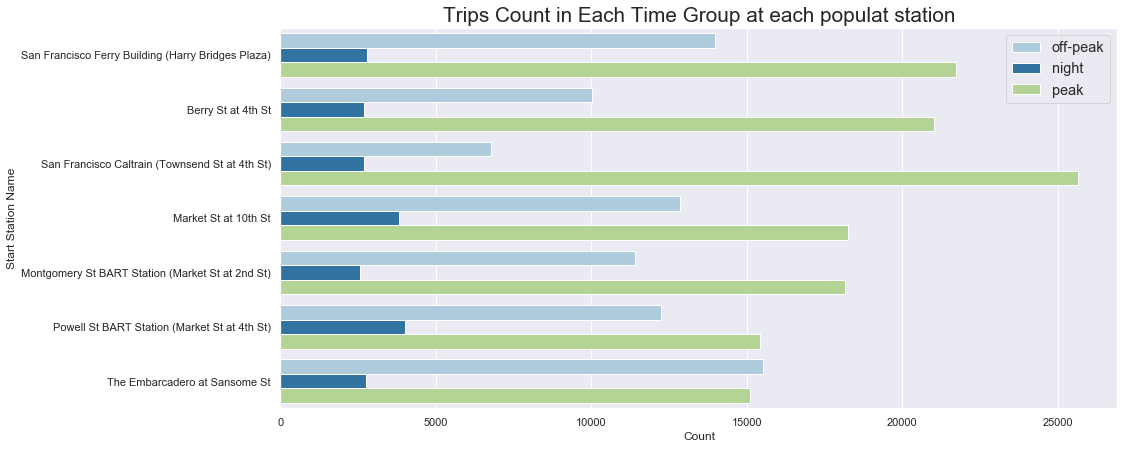

In [156]:
plt.figure(figsize=[15, 7])
plt.title('Trips Count in Each Time Group at each popular station',fontsize='xx-large')
sns.countplot(data=df_ps, y='start_station_name', hue='Rush',palette="Paired")
plt.legend(loc='upper right',fontsize='large')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

Then I am curious about the trip made in each time group in each day. From the graph we can see that in workdays trips made in peak hours is way higher in number. Trips made in night time is lower in number than in off-peak time. At weekend, trips made in off peak time is higher than peak time which may suggest that most people do not work overtime at weekends.

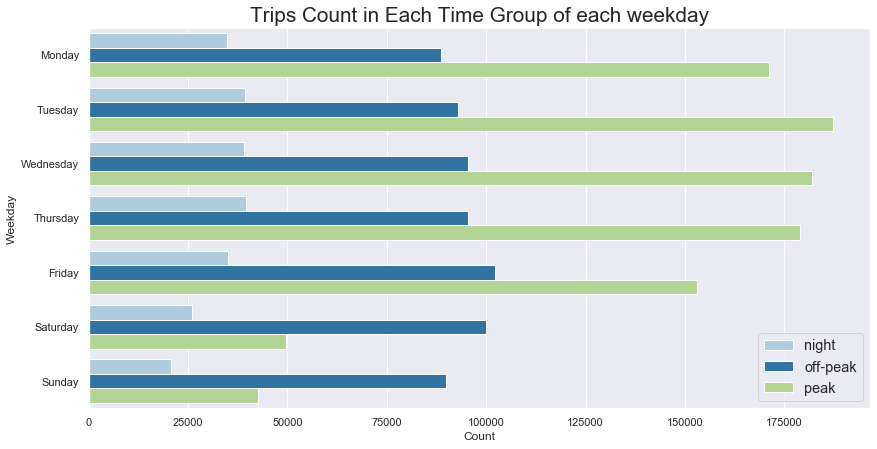

In [155]:
plt.figure(figsize=[14, 7])
plt.title('Trips Count in Each Time Group of each weekday',fontsize='xx-large')
sns.countplot(data=df1, y='start_day', hue='Rush',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="Paired")
plt.legend(loc='lower right',fontsize='large')
plt.ylabel('Weekday')
plt.xlabel('Count');

Then I analyse the user type distribution in each of the eight popular stations which shows that 3 of those eight stations have a relatively higher customer ratio. For example,The Embarcadero at Sansome St has almost 1/3 of its users to have chosen not to be a subscriber. This might suggest that users at those stations typically have more commuters are more likely to become a subscriber. 

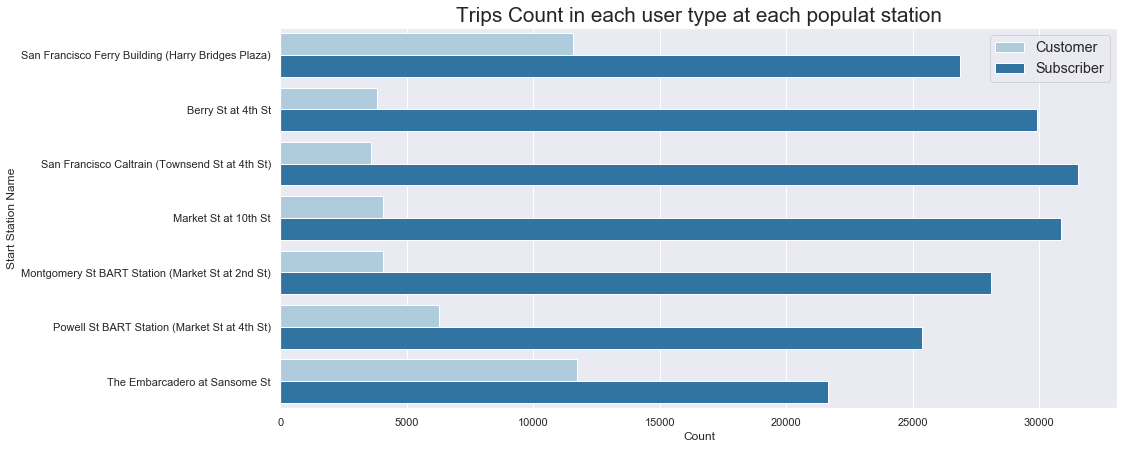

In [158]:
plt.figure(figsize=[15, 7])
plt.title('Trips Count in each user type at each populat station',fontsize='xx-large')
sns.countplot(data=df_ps, y='start_station_name', hue='user_type',palette='Paired')
plt.legend(loc='upper right',fontsize='large')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

Then I count the number of user type respectively in each time group. This graph shows that though trips made in off-peak hours are fewer than in peak hours, customers tend to take trip in off-peak hours.Those travel in peak time are more likely to become subscribers.

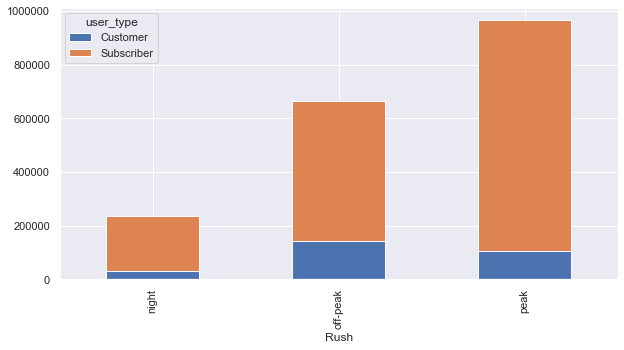

In [159]:
df_User_Rush = df.groupby(['Rush', 'user_type']).size().reset_index().pivot(columns='user_type', index='Rush', values=0)
df_User_Rush.plot(kind='bar', stacked=True,figsize=[10,5])

Multivariate Exploration

In [160]:
df_ps.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,Month,Rush,start_day
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,1,off-peak,Wednesday
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,93.0,4th St at Mission Bay Blvd S,1403,Subscriber,1,night,Wednesday
30,375,2018-01-31 22:56:31.082,2018-01-31 23:02:46.583,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,3401,Subscriber,1,night,Wednesday
32,2219,2018-01-31 22:24:39.943,2018-01-31 23:01:39.571,30.0,San Francisco Caltrain (Townsend St at 4th St),81.0,Berry St at 4th St,1757,Subscriber,1,night,Wednesday
41,222,2018-01-31 22:44:28.364,2018-01-31 22:48:11.022,58.0,Market St at 10th St,61.0,Howard St at 8th St,3483,Subscriber,1,night,Wednesday


Since the duration data is widly spread and there are too much information, I only choose duration between 4 min to 25min to make graph more clear.

In [17]:
df_plot=df1[(df1['duration_sec']>=240)&(df1['duration_sec']<=1500)]
df_plot.to_csv('bike2018_main.csv',index=False)

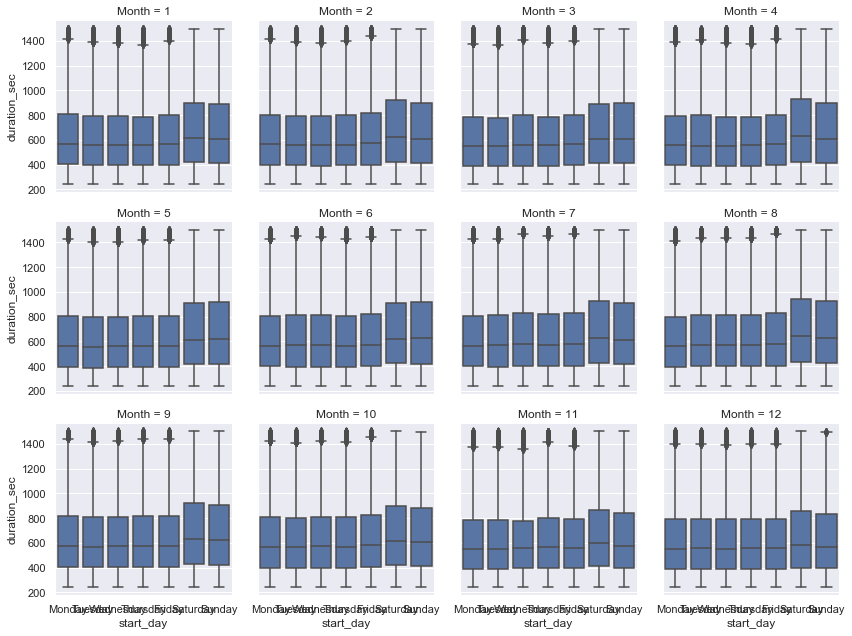

In [178]:
plot = sns.FacetGrid(data=df_plot, col='Month', col_wrap=4)
plot.map(sns.boxplot,'start_day', 'duration_sec',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

From this graph we can see that the duration distribution in each month seems to be of a similiar pattern. In workdays the mean values are almost the same while at weekends the median duration is higher and the span is wider.This might suggest that users tend to take longer trips during weekends.

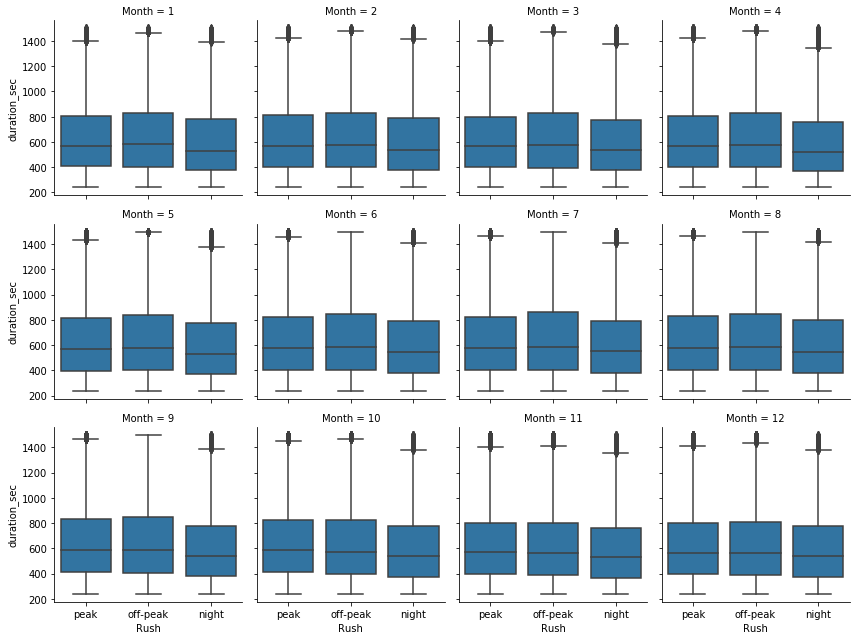

In [8]:
plot = sns.FacetGrid(data=df_plot, col='Month', col_wrap=4)
plot.map(sns.boxplot,'Rush', 'duration_sec',order=['peak','off-peak','night']);

This pattern shows no specific findings.Which suggests that in each month the duration in each time group has a similiar pattern.

C:\Users\15300\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


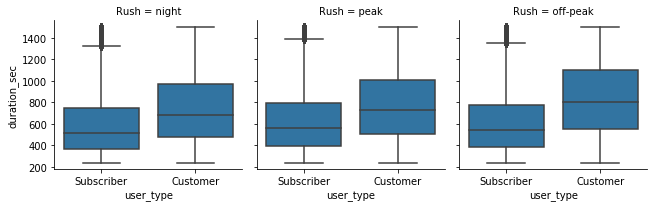

In [9]:
plot = sns.FacetGrid(data=df_plot, col='Rush', col_wrap=4)
plot.map(sns.boxplot,'user_type', 'duration_sec');

From this graph we can see that customers tend to take longer trips than subscribers.

Interesting findings:
1. Users prefer to take longer trip at weekends
2. Non-subscribers tend to take longer trip than subscribers.
3. Some stations which are popular during peak time tend to have more subscribers.
4. Users travel during peak time are more likely to be subscribers.
5. Trips number in each month is different but the duration distribution of weekly pattern and daily pattern are similiar throughout those 12 months.